### Mark Hoogendoorn and Burkhardt Funk (2017)              
Machine Learning for the Quantified Self               
Springer,
Chapter 7    

In [28]:
from util.VisualizeDataset import VisualizeDataset
from Chapter7.PrepareDatasetForLearning import PrepareDatasetForLearning
from Chapter7.LearningAlgorithms import ClassificationAlgorithms
from Chapter7.LearningAlgorithms import RegressionAlgorithms
from Chapter7.Evaluation import ClassificationEvaluation
from Chapter7.Evaluation import RegressionEvaluation
from Chapter7.FeatureSelection import FeatureSelectionClassification
from Chapter7.FeatureSelection import FeatureSelectionRegression
import copy
import pandas as pd
from util import util
import matplotlib.pyplot as plot
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from util import ClassificationReport
import os

In [29]:
DataViz = VisualizeDataset()

# Read the result from the previous chapter, and make sure the index is of the type datetime.
dataset_path = 'intermediate_datafiles/'

export_tree_path = 'Example_graphs/Chapter7/'

try:
    dataset = pd.read_csv(dataset_path + 'chapter5_result.csv', index_col=0)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e

if not os.path.exists(export_tree_path):
    os.makedirs(export_tree_path)

dataset.index = pd.to_datetime(dataset.index, format='%Y-%m-%d %H:%M:%S.%f'[:-3])

In [30]:
# Remove unnecessary columns
del dataset['participant']
del dataset['category']
del dataset['set']

In [32]:
# Load algorithms
learner = ClassificationAlgorithms()
eval = ClassificationEvaluation()

In [33]:
selected_features = ['pca_1',
 'gyr_r_freq_0.0_Hz_ws_50',
 'acc_z',
 'acc_y_temp_mean_ws_5',
 'acc_x_temp_mean_ws_5',
 'acc_y_temp_std_ws_5',
 'gyr_r_freq_2.2_Hz_ws_50',
 'gyr_r_freq_1.4_Hz_ws_50',
 'gyr_r_freq_2.3_Hz_ws_50',
 'acc_r_max_freq']

In [34]:
# Train a random forest predict class labels
class_train_y, class_test_y, class_train_prob_y, class_test_prob_y, model = learner.random_forest(train_X[selected_features], train_y, test_X[selected_features],
                                                                                           gridsearch=True, print_model_details=True)

{'n_estimators': 100, 'criterion': 'entropy', 'min_samples_leaf': 2}
Feature importance random forest:
pca_1  &  0.232100270521
acc_z  &  0.185464870613
acc_y_temp_mean_ws_5  &  0.1794824309
gyr_r_freq_0.0_Hz_ws_50  &  0.167267615774
acc_x_temp_mean_ws_5  &  0.140153792201
acc_y_temp_std_ws_5  &  0.0728120248389
gyr_r_freq_1.4_Hz_ws_50  &  0.00975170867251
gyr_r_freq_2.2_Hz_ws_50  &  0.00670234112717
gyr_r_freq_2.3_Hz_ws_50  &  0.00626494535326
acc_r_max_freq  &  0.0


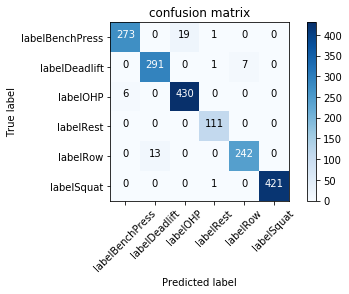

In [35]:
# Performance on the test set
test_cm = eval.confusion_matrix(test_y, class_test_y, class_train_prob_y.columns)
DataViz.plot_confusion_matrix(test_cm, class_train_prob_y.columns, normalize=False)

In [36]:
cm = confusion_matrix(test_y, class_test_y, class_train_prob_y.columns)
cr = classification_report(test_y, class_test_y, class_train_prob_y.columns)
accuracy = accuracy_score(test_y, class_test_y)

In [37]:
accuracy

0.97356828193832601